# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': customer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

## Get the Data

In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler

# 1. Exploratory Data Analysis

In [6]:
ads = pd.read_csv("advertising.csv")

In [18]:
ads.head()


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [17]:
ads["Ad Topic Line"].nunique()

1000

In [12]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [11]:
print(ads["Country"].nunique())
ads["City"].nunique()

237


969

In [ ]:
ads.groupby("Country")["City"].count()

Country
Afghanistan          8
Albania              7
Algeria              6
American Samoa       5
Andorra              2
                    ..
Wallis and Futuna    4
Western Sahara       7
Yemen                3
Zambia               4
Zimbabwe             6
Name: City, Length: 237, dtype: int64

In [20]:
ads.drop(columns=["Country","City","Ad Topic Line"],axis=1,inplace=True)

In [31]:
ads["Timestamp"] = pd.to_datetime(ads["Timestamp"])
ads["dia semana"] = (ads["Timestamp"].dt.dayofweek)+1

In [32]:
lista_findes =[]
for x in ads["dia semana"]:
    if x >= 6 :
        lista_findes.append(1)
    else :
        lista_findes.append(0)

In [39]:
ads["fin de semana"] = lista_findes
ads["dia semana"] = ads["Timestamp"].dt.day_name()
ads = pd.get_dummies(ads,columns=["dia semana"])

In [41]:
ads.drop(columns=["Timestamp"], axis = 1, inplace=True)

In [44]:
ads.rename(columns={"dia semana_Friday":"Viernes","dia semana_Monday":"Lunes","dia semana_Tuesday":"Martes","dia semana_Wednesday":"Miercoles","dia semana_Thursday":"Jueves","dia semana_Saturday":"Sabado","dia semana_Sunday":"Domingo"},inplace=True)

In [ ]:
ads

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,fin de semana,Viernes,Lunes,Sabado,Domingo,Jueves,Martes,Miercoles
0,68.95,35,61833.90,256.09,0,0,1,False,False,False,True,False,False,False
1,80.23,31,68441.85,193.77,1,0,0,False,True,False,False,False,False,False
2,69.47,26,59785.94,236.50,0,0,1,False,False,False,True,False,False,False
3,74.15,29,54806.18,245.89,1,0,1,False,False,False,True,False,False,False
4,68.37,35,73889.99,225.58,0,0,0,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,0,False,False,False,False,True,False,False
996,51.30,45,67782.17,134.42,1,1,0,True,False,False,False,False,False,False
997,51.63,51,42415.72,120.37,1,1,0,False,True,False,False,False,False,False
998,55.55,19,41920.79,187.95,0,0,0,False,False,False,False,True,False,False


<Axes: >

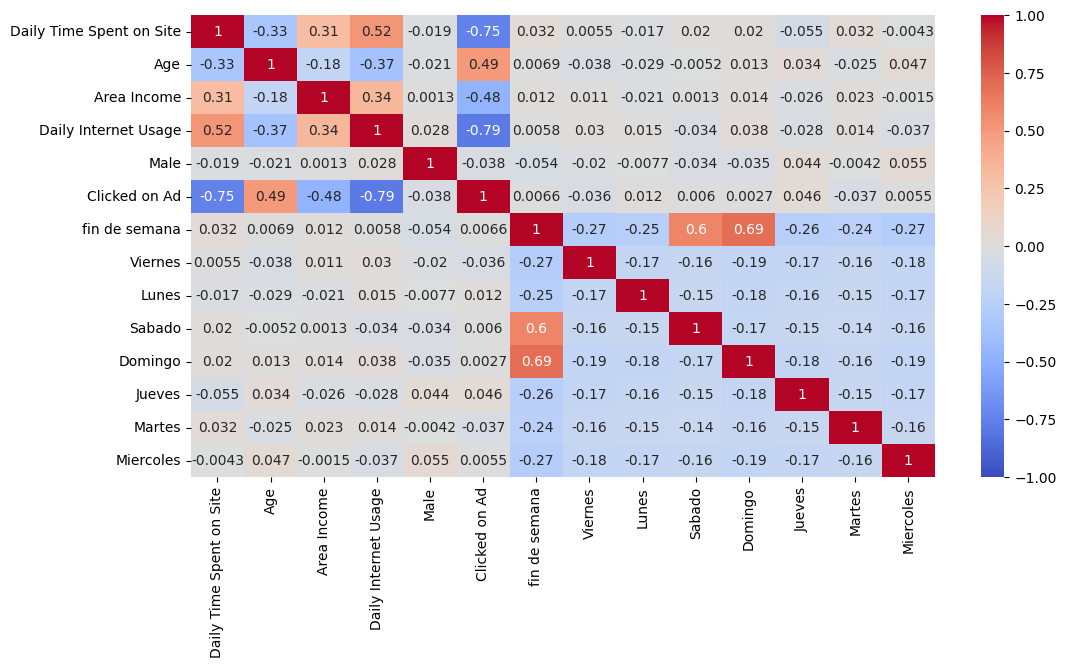

In [47]:
plt.figure(figsize=(12,6))
sns.heatmap(ads.corr(),annot = True,vmin=-1,cmap="coolwarm")

In [ ]:
ads.drop(columns=["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo","fin de semana"],inplace=True)

<Axes: >

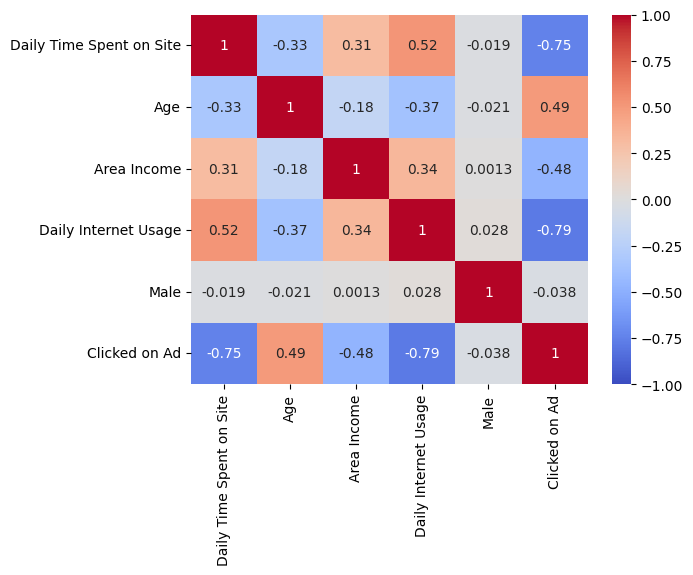

In [49]:
sns.heatmap(ads.corr(),annot = True,vmin=-1,cmap="coolwarm")

In [50]:
ads.drop(columns=["Male"],inplace=True)

array([[<Axes: title={'center': 'Daily Time Spent on Site'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Area Income'}>,
        <Axes: title={'center': 'Daily Internet Usage'}>]], dtype=object)

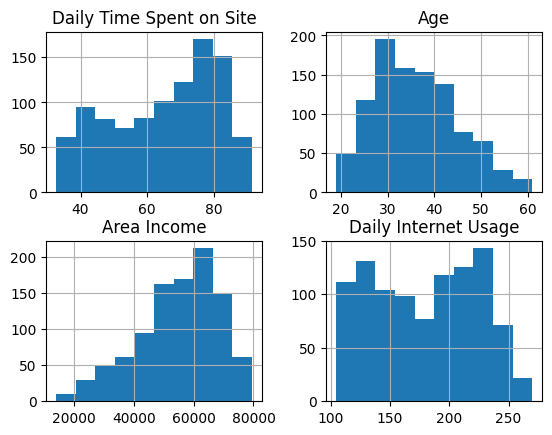

In [52]:
ads.drop(columns=['Clicked on Ad']).hist()

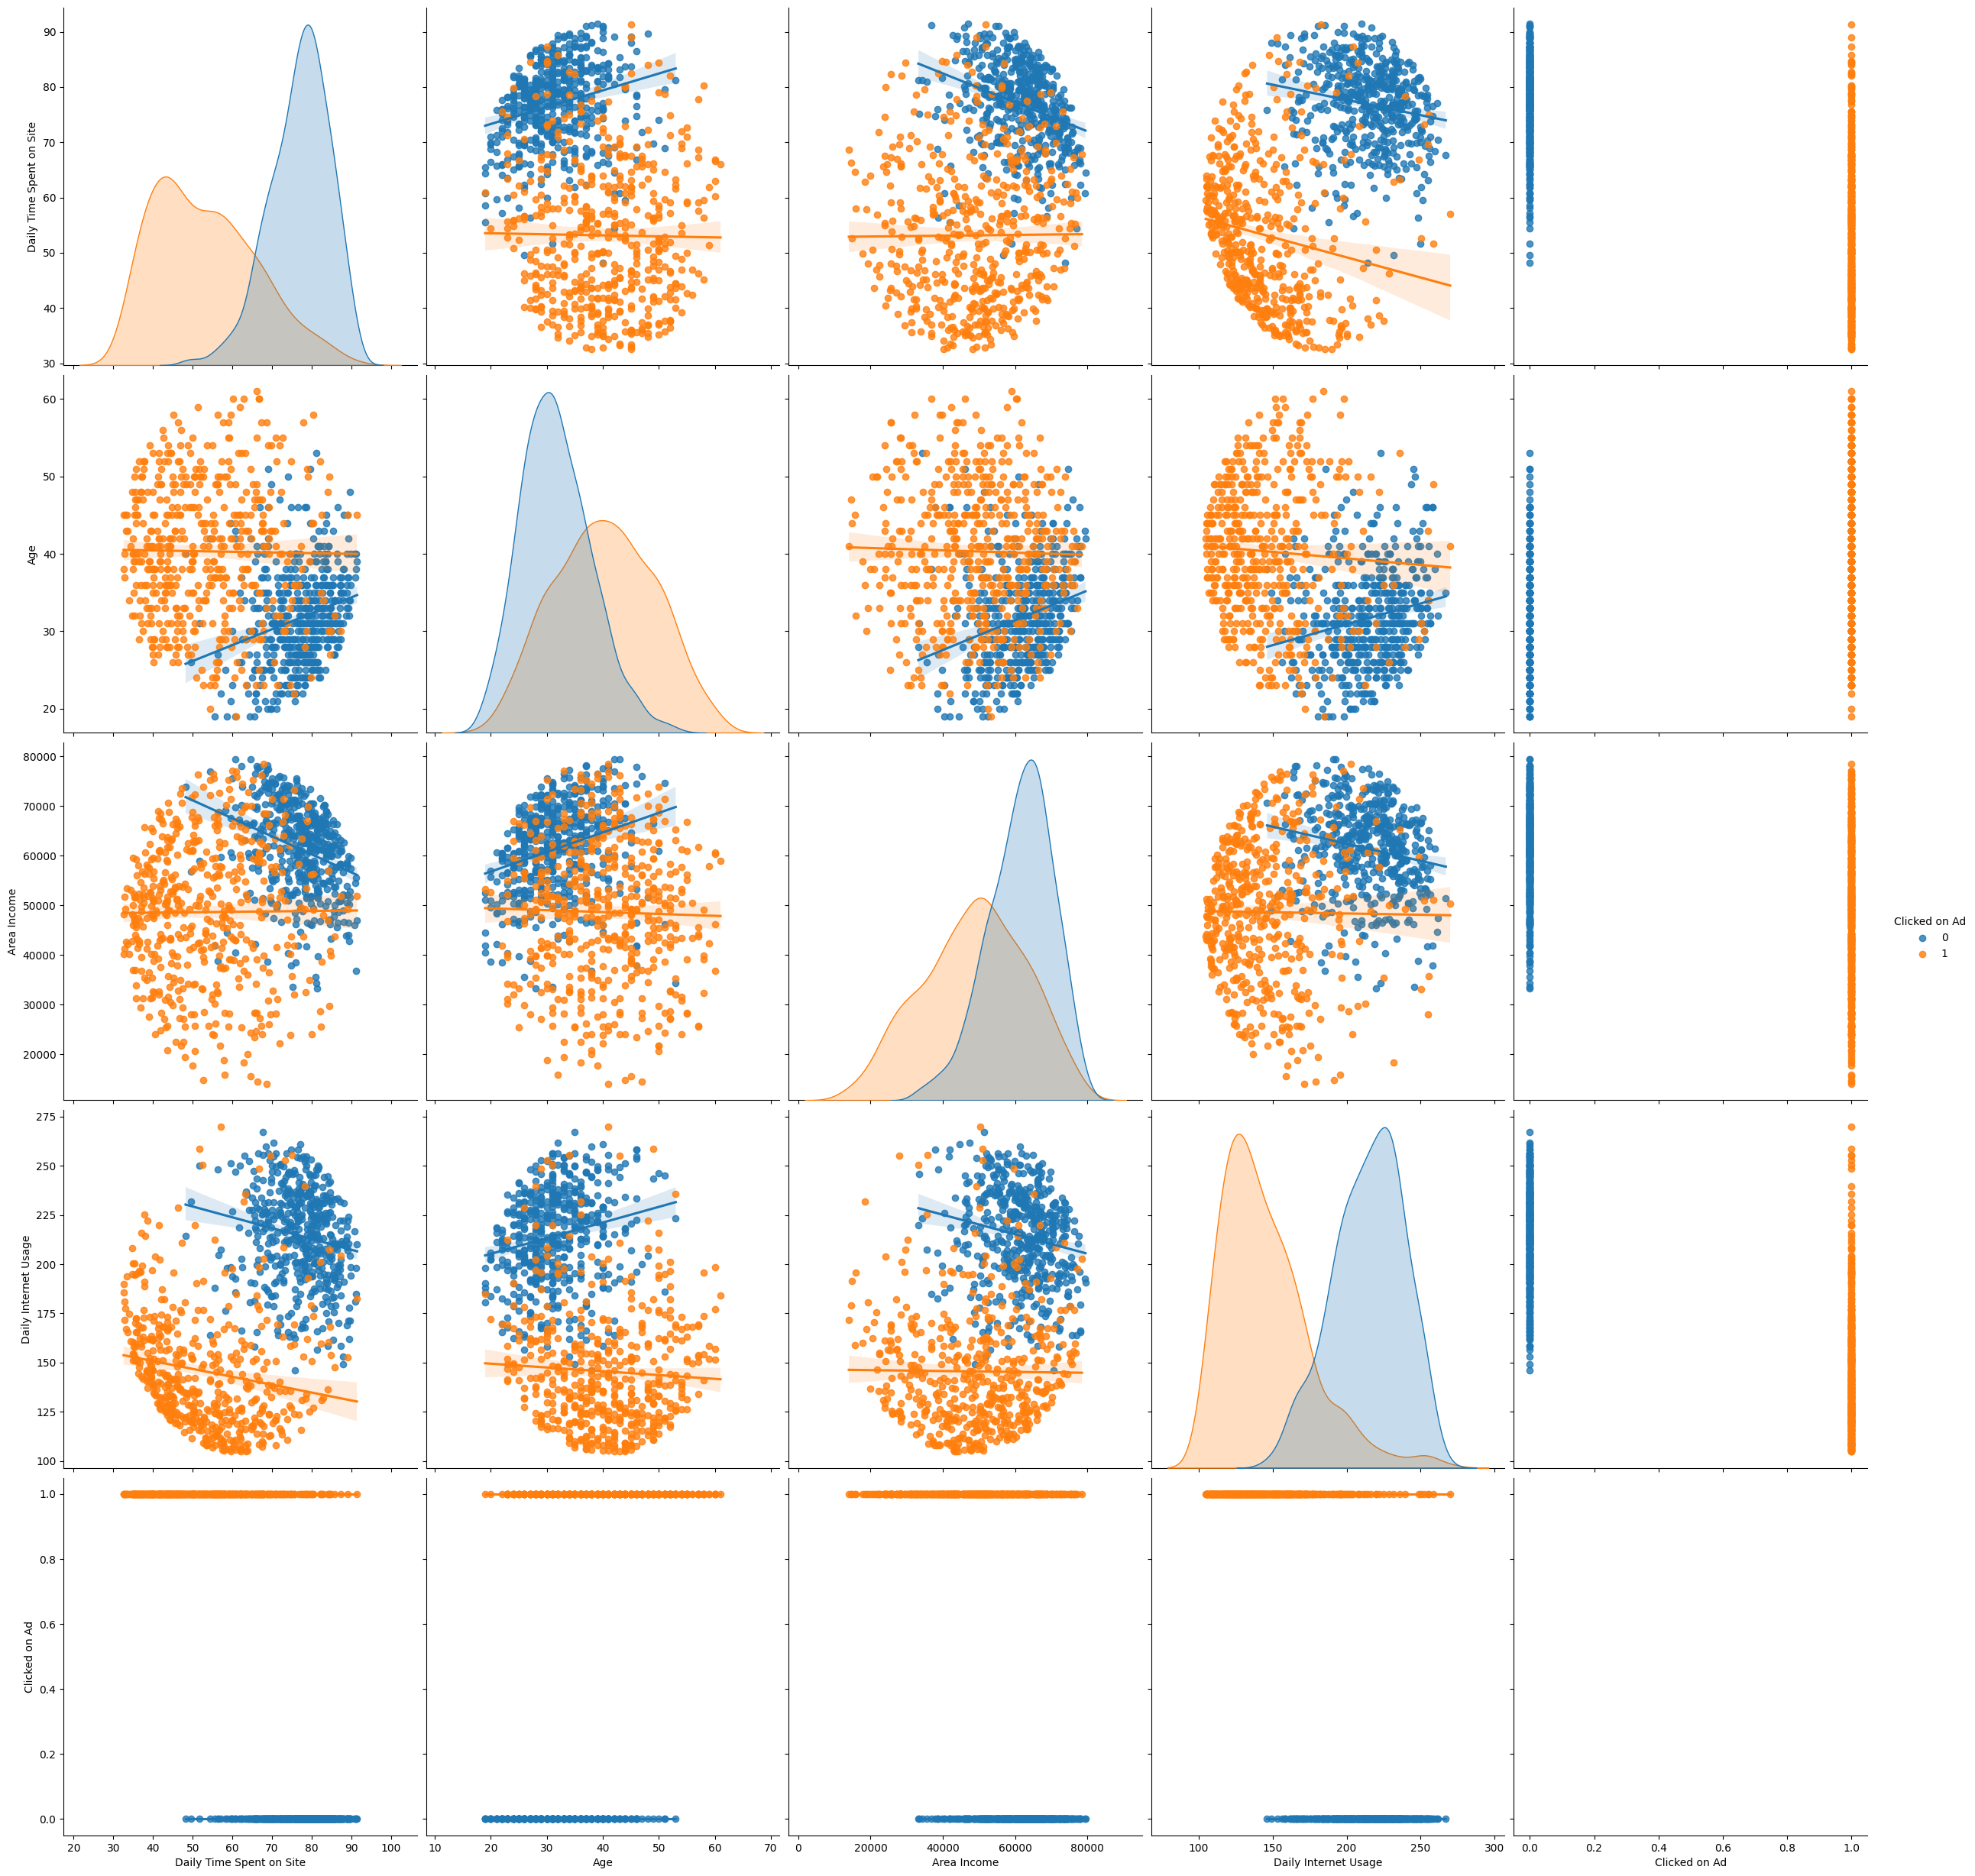

In [54]:
sns.pairplot(ads,
            hue='Clicked on Ad',
            height=5,
            vars=['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Clicked on Ad'],
            kind='reg')


#### 2. Train test split


In [55]:
X = ads[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage']]
y = ads["Clicked on Ad"]

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 4)
(200, 4)
(800,)
(200,)



#### 3. StandardScaler()


In [59]:
scaler = StandardScaler()
X_train_Scal = scaler.fit_transform(X_train)
X_test_Scal = scaler.transform(X_test)

# 3. Implement a Logistic Regression in Scikit-Learn and predict. Use cross validation.

In [63]:
modelo_1 = LogisticRegression(max_iter=1000)
scores = cross_val_score(modelo_1,X_train_Scal,y_train,cv = 5, scoring="accuracy")

In [64]:
scores

array([0.98125, 0.9875 , 0.9625 , 0.94375, 0.98125])

In [65]:
parametros = {"C" : np.arange(0.1,10,0.1)}

gs = GridSearchCV(estimator=modelo_1, param_grid=parametros, cv=3, scoring='accuracy', verbose=3)
gs.fit(X_train_Scal, y_train)

print(gs.best_estimator_)
print(gs.best_score_)
print(gs.best_params_)

Fitting 3 folds for each of 99 candidates, totalling 297 fits
[CV 1/3] END .............................C=0.1;, score=0.985 total time=   0.0s
[CV 2/3] END .............................C=0.1;, score=0.974 total time=   0.0s
[CV 3/3] END .............................C=0.1;, score=0.970 total time=   0.0s
[CV 1/3] END .............................C=0.2;, score=0.985 total time=   0.0s
[CV 2/3] END .............................C=0.2;, score=0.966 total time=   0.0s
[CV 3/3] END .............................C=0.2;, score=0.974 total time=   0.0s
[CV 1/3] END .............C=0.30000000000000004;, score=0.985 total time=   0.0s
[CV 2/3] END .............C=0.30000000000000004;, score=0.966 total time=   0.0s
[CV 3/3] END .............C=0.30000000000000004;, score=0.974 total time=   0.0s
[CV 1/3] END .............................C=0.4;, score=0.985 total time=   0.0s
[CV 2/3] END .............................C=0.4;, score=0.966 total time=   0.0s
[CV 3/3] END .............................C=0.4

In [66]:
modelo_final = gs.best_estimator_
predicciones = modelo_final.predict(X_test_Scal)

# 4. Evaluation


#### 0. Accuracy

In [68]:
accuracy_score(y_test,predicciones)

0.945

Predicciones correctas / total predicciones

TP + TN / (TP + TN + FP + FN)


#### 1. Confusion Matrix


In [71]:
matriz_muy_confusa = confusion_matrix(y_test,predicciones)
matriz_muy_confusa

array([[ 87,   2],
       [  9, 102]])

<Axes: >

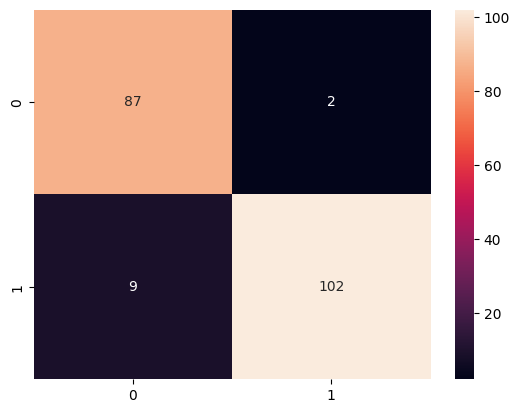

In [77]:
sns.heatmap(matriz_muy_confusa, annot=True,fmt= '.0f')

In [82]:
print(classification_report(y_test,predicciones))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.98      0.92      0.95       111

    accuracy                           0.94       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.95      0.94      0.95       200




#### 2. Precision


Cuántos son realmente 1s, de todos los que ha predicho como 1s

TP / (TP + FP)

In [79]:
precision_score(y_test,predicciones)


0.9807692307692307



#### 3. Recall


Cuántos has predicho como 1, de los que realmente eran 1s

TP / (TP + FN)

In [80]:
recall_score(y_test,predicciones)

0.918918918918919



#### 4. F1 Score


2 * p * r / (r + p)

In [83]:
f1_score(y_test,predicciones)

0.9488372093023256



#### 5. ROC curve

In [87]:
predicciones_prob = modelo_final.predict_proba(X_test_Scal)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicciones_prob)

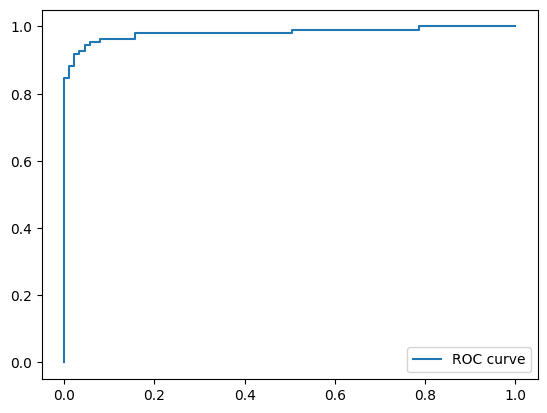

In [89]:
plt.plot(fpr,tpr, label="ROC curve")
plt.legend()



#### 6. P-R curve